In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Data Clean Up
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
df_DA_US = df[(df['job_title'] == 'Data Analyst') & (df['job_country']=='United States')].copy()
df_DA_US['job_posted_month_no'] = df_DA_US['job_posted_date'].dt.month

DA_totals = df_DA_US.groupby('job_posted_month_no').size()

df_DA_US_explode = df_DA_US.explode('job_skills')
df_DA_US_pivot = df_DA_US_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value= 0)
df_DA_US_pivot.loc['Total'] = df_DA_US_pivot.sum()

df_DA_US_pivot = df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending= False).index]
df_DA_US_pivot = df_DA_US_pivot.drop('Total')

df_DA_US_pivot.plot(kind='line')

In [ ]:
df_DA_US_Percent = df_DA_US_pivot.div(DA_totals/100, axis=0)
df_DA_US_Percent = df_DA_US_Percent.reset_index()
df_DA_US_Percent['job_posted_month'] = df_DA_US_Percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_US_Percent = df_DA_US_Percent.set_index('job_posted_month')
df_DA_US_Percent = df_DA_US_Percent.drop(columns= 'job_posted_month_no')

df_DA_US_Percent


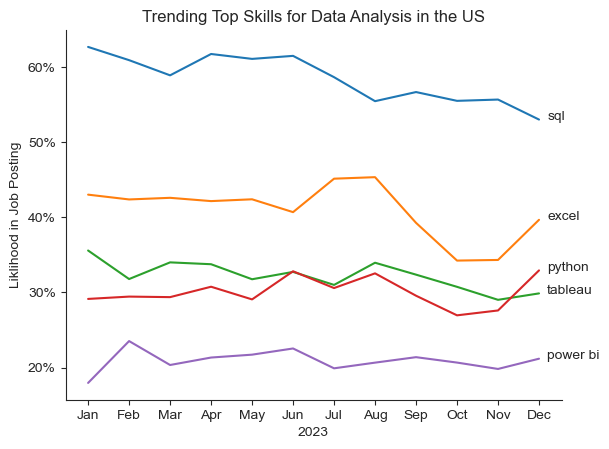

In [43]:
df_plot = df_DA_US_Percent.iloc[:, :5]
sns.set_style('ticks')
sns.lineplot(data=df_plot, dashes=False, palette= 'tab10')
sns.despine()


plt.title('Trending Top Skills for Data Analysis in the US')
plt.ylabel('Liklihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i])
